## 2. Getting slightly more advanced


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

import keras
from keras.models import Model, Sequential
from keras.layers import *
from keras.optimizers import Adam
import keras.backend as K

import tensorflow as tf
import numpy as np

In [7]:
print(keras.__version__)
print(tf.__version__)

2.0.4
1.1.0


### Lets import our dataset

In [8]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

n_classes = 10
# convert class vectors to binary One Hot Encoded
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)
y_train[0]

(60000, 784) train samples
(10000, 784) test samples


array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

### Setting up our Network Hyper Parameters

In [10]:
# Training Parameters for basic MNIST
learning_rate = 0.1 
training_epochs = 10
batch_size = 100

# Network Parameters
n_input = 784 # MNIST data input (img shape: 28*28 flattened to be 784)
n_hidden_1 = 384 # 1st layer number of neurons
n_hidden_2 = 100 # 2nd layer number of neurons
n_hidden_3 = 100 # 2nd layer number of neurons
n_classes = 10 # MNIST classes for prediction(digits 0-9 )

### This time we are going to make a functional model instead of a sequential model

In [11]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Dense_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Dense_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Dense_3")(x)
output = Dense(n_classes, activation='softmax', name = "Outputlayer")(x)


In [12]:
# This creates a model that includes our input, 3 dense hidden layers, output layer
model = Model(Inp, output)

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
Dense_1 (Dense)              (None, 384)               301440    
_________________________________________________________________
Dense_2 (Dense)              (None, 100)               38500     
_________________________________________________________________
Dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
Outputlayer (Dense)          (None, 10)                1010      
Total params: 351,050
Trainable params: 351,050
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [15]:
K.set_value(model.optimizer.lr, learning_rate)

In [10]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s - loss: 1.0907 - acc: 0.7186 - val_loss: 0.4401 - val_acc: 0.8863

In [13]:
def plot_train(hist):
    h = hist.history
    if 'acc' in h:
        meas='acc'
        loc='lower right'
    else:
        meas='loss'
        loc='upper right'
    plt.plot(hist.history[meas])
    plt.plot(hist.history['val_'+meas])
    plt.title('model '+meas)
    plt.ylabel(meas)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc=loc)
    

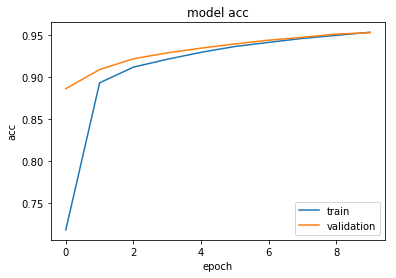

In [14]:
plot_train(history)

Now lets add dropput

Dropout(0.3) = randomly dropout 30% of the units each pass through

In [ ]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Dense_1")(Inp)
x = Dropout(0.3)(x)
x = Dense(n_hidden_2, activation='relu', name = "Dense_2")(x)
x = Dropout(0.3)(x)
x = Dense(n_hidden_3, activation='relu', name = "Dense_3")(x)
output = Dense(n_classes, activation='softmax', name = "Outputlayer")(x)


In [ ]:
model = Model(Inp, output)

In [ ]:
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

In [ ]:
plot_train(history)

In [14]:
model.predict(x_test[0:4])

array([[  2.42912487e-04,   5.95893198e-07,   2.07550195e-03,
          4.12603235e-03,   1.30148339e-06,   1.20657744e-04,
          2.00803107e-08,   9.93187308e-01,   1.49141324e-05,
          2.30762656e-04],
       [  2.47427088e-04,   3.17124475e-04,   9.89476800e-01,
          8.36454984e-03,   1.33202278e-07,   5.38946595e-04,
          6.20625564e-04,   7.99649854e-07,   4.33580397e-04,
          2.82739876e-08],
       [  4.02450023e-05,   9.82449651e-01,   4.74253623e-03,
          1.52104336e-03,   4.36383649e-04,   5.01608883e-04,
          1.98678323e-03,   3.69707868e-03,   4.37750760e-03,
          2.47078744e-04],
       [  9.99739468e-01,   3.81427014e-08,   1.80251431e-04,
          9.40522023e-06,   1.24996433e-07,   4.56111547e-06,
          3.35981349e-05,   1.53472538e-05,   1.80730967e-06,
          1.53038309e-05]], dtype=float32)

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.154126490853
Test accuracy: 0.9541


### Build a netowork with at least 7 layers and uses dropout